In [9]:
# Dependencies
!pip install folium
!pip install psycopg2-binary
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import folium
import flask
import webbrowser
from IPython.display import IFrame
import psycopg2 #PostgreSQL adapter


In [10]:
# Reading in CSV file and testing to make sure data is reading in correctly
file_path = 'ufo_final.csv' 
ufo_data = pd.read_csv(file_path)
# Cleaning the 'duration (seconds)' column 
def clean_duration(value): 
    try: 
        return float(value) 
    except ValueError: return None 
ufo_data['duration (seconds)'] = ufo_data['duration (seconds)'].apply(clean_duration) 
#Dropping rows with NaN values in 'duration (seconds)' column if any 
ufo_data = ufo_data.dropna(subset=['duration (seconds)']) 
print(ufo_data.head())

   Unnamed: 0          datetime        city state country     shape  \
0           0  10/10/1949 20:30  san marcos    tx      us  cylinder   
1           3  10/10/1956 21:00        edna    tx      us    circle   
2           4  10/10/1960 20:00     kaneohe    hi      us     light   
3           5  10/10/1961 19:00     bristol    tn      us    sphere   
4           7  10/10/1965 23:45     norwalk    ct      us      disk   

   duration (seconds) duration (hours/min)  \
0              2700.0           45 minutes   
1                20.0             1/2 hour   
2               900.0           15 minutes   
3               300.0            5 minutes   
4              1200.0           20 minutes   

                                            comments date posted   latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.883056   
1  My older brother and twin sister were leaving ...   1/17/2004  28.978333   
2  AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22

C:\Users\zacha\AppData\Local\Temp\ipykernel_29408\4233445583.py:3: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.



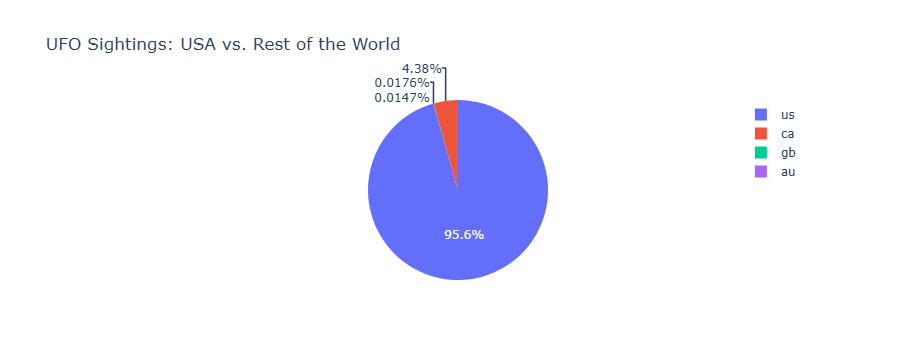

In [11]:
#Chase - Visualization
# Grouping sightings by country 
sightings_count = ufo_data.groupby('country').size().reset_index(name='counts') 
# Creating a pie chart with plotly.express 
fig = px.pie(sightings_count, names='country', values='counts', title='UFO Sightings: USA vs. Rest of the World') 
fig.show()

In [15]:
import pandas as pd
import folium
from IPython.display import IFrame

# Define the location for the map's center
map_center = [39.8283, -98.5795]  # Geographic center of the USA

# Folium map centered at the defined location
ufo_map = folium.Map(location=map_center, zoom_start=4)

# Function to add markers with detailed error handling
def add_marker_to_map(row):
    try:
        latitude = float(row['latitude'])
        longitude = float(row['longitude '])
        if not pd.isna(latitude) and not pd.isna(longitude):
            folium.Marker(
                location=[latitude, longitude],
                popup=row['comments']
            ).add_to(ufo_map)
    except Exception as e:
        print(f"Error adding marker for row {row}: {e}")

# Apply the function to each row
ufo_data.apply(add_marker_to_map, axis=1)

# Save the map to an HTML file
ufo_map.save('ufo_map.html')

# Display the map in a Jupyter Notebook environment
IFrame('ufo_map.html', width=700, height=500)


In [16]:
# Sample data (assuming ufo_data is your DataFrame)
# ufo_data = pd.DataFrame({
#     'latitude': [40.7128, 34.0522, 41.8781],
#     'longitude ': [-74.0060, -118.2437, -87.6298],  # Notice the space in 'longitude '
#     'comments': ['New York City', 'Los Angeles', 'Chicago']
# })

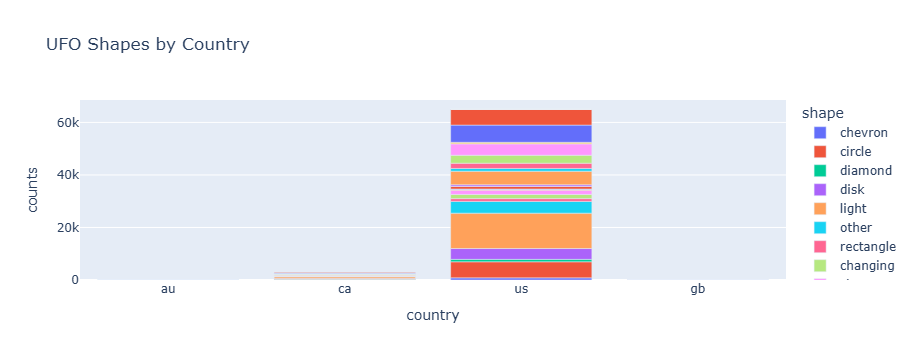

In [17]:
#Jeff - Visualization
shapes_count = ufo_data.groupby(['country', 'shape']).size().reset_index(name='counts')
fig = px.bar(shapes_count, x='country', y='counts', color='shape', title='UFO Shapes by Country')
fig.show()
